# Variables

In [1]:
from __future__ import print_function
import torch
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from datetime import date
date.today()

datetime.date(2017, 9, 28)

In [3]:
author = "kyubyong. https://github.com/Kyubyong/pytorch_exercises"

In [4]:
torch.__version__

'0.2.0_3'

In [5]:
np.__version__

'1.13.2'

NOTE on notation

    _x, _y, _z, ...: NumPy 0-d or 1-d arrays
    _X, _Y, _Z, ...: NumPy 2-d or higer dimensional arrays
    x, y, z, ...: 0-d or 1-d tensors
    X, Y, Z, ...: 2-d or higher dimensional tensors


In [6]:
from torch.autograd import Variable

## Variables 

Q0. Create a variable `X` of the size (3, 2), filled with 1's.

In [7]:
X = Variable(torch.ones(3, 2))
print(X)

Variable containing:
 1  1
 1  1
 1  1
[torch.FloatTensor of size 3x2]



Q1. Get the tensor of Variable X.

In [8]:
X = Variable(torch.randn(3, 3))
Y = X.data
print(Y)


 0.8075  0.2259  0.7292
 0.5840 -0.5985 -1.5452
 0.7410 -0.2508 -1.1745
[torch.FloatTensor of size 3x3]



Q2. Complete the code.

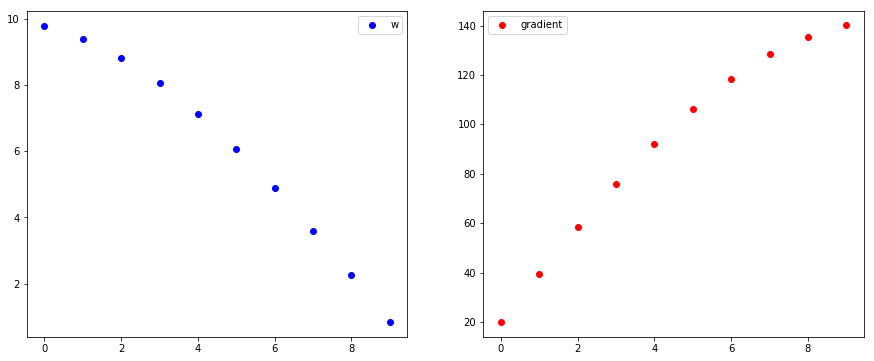

In [9]:
# Create a trainable variable `w` of scalar 10.
w = Variable(torch.ones(1)*10, requires_grad=True)

gs, ws, grads = [], [], []
for i in range(10):
    y = w ** 2 + 2
    
    # apply backpropagation to y.
    y.backward()
    
    w.data -= 0.01 * w.grad.data
    
    gs.append(i)
    ws.append(w.data[0])
    grads.append(w.grad.data[0])

plt.figure(figsize=(15,6))
ax=plt.subplot(1, 2, 1)
ax.scatter(gs, ws, c="b", label="w")
ax.legend(loc="upper right")
ax=plt.subplot(1, 2, 2)
plt.scatter(gs, grads, c="r", label="gradient")
plt.legend(loc="upper left")
plt.show()


Q3. Complete the code. <br>This is adapted from `http://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_autograd.html`.

Epoch 010/500: loss 3622828.00000
Epoch 020/500: loss 240678.50000
Epoch 030/500: loss 68993.89062
Epoch 040/500: loss 24136.43945
Epoch 050/500: loss 9427.08691
Epoch 060/500: loss 3968.63916
Epoch 070/500: loss 1762.71545
Epoch 080/500: loss 816.37415
Epoch 090/500: loss 388.99170
Epoch 100/500: loss 189.52725
Epoch 110/500: loss 94.02654
Epoch 120/500: loss 47.34197
Epoch 130/500: loss 24.13431
Epoch 140/500: loss 12.43430
Epoch 150/500: loss 6.46430
Epoch 160/500: loss 3.38794
Epoch 170/500: loss 1.78757
Epoch 180/500: loss 0.94889
Epoch 190/500: loss 0.50667
Epoch 200/500: loss 0.27179
Epoch 210/500: loss 0.14644
Epoch 220/500: loss 0.07919
Epoch 230/500: loss 0.04301
Epoch 240/500: loss 0.02346
Epoch 250/500: loss 0.01288
Epoch 260/500: loss 0.00713
Epoch 270/500: loss 0.00402
Epoch 280/500: loss 0.00232
Epoch 290/500: loss 0.00139
Epoch 300/500: loss 0.00086
Epoch 310/500: loss 0.00056
Epoch 320/500: loss 0.00038
Epoch 330/500: loss 0.00026
Epoch 340/500: loss 0.00019
Epoch 350/

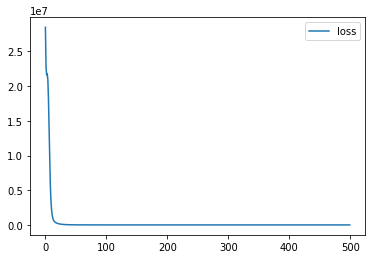

In [10]:
# Untrainable variables
# Create untrainable variables X and Y.
X = Variable(torch.randn(64, 1000), requires_grad=False)
Y = Variable(torch.randn(64, 10), requires_grad=False)

# Trainable Variables
w1 = Variable(torch.randn(1000, 100), requires_grad=True)
w2 = Variable(torch.randn(100, 10), requires_grad=True)

# Parameters
n_epochs = 500
learning_rate = 1e-6
log_interval = 10

losses = []
for t in range(n_epochs):
    Y_pred = X.matmul(w1).clamp(min=0).matmul(w2)
    
    # Apply L2 loss to Y pred and Y.
    loss = (Y_pred - Y).pow(2).sum()
    losses.append(loss.data[0])

    loss.backward()
    
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data  

    # Manually zero the gradients after updating weights
    w1.grad.data.zero_()
    w2.grad.data.zero_()
    
    if (t + 1) % log_interval == 0:
        print("Epoch {:03d}/{:03d}: loss {:.5f}".format(
                t + 1, n_epochs, loss.data[0]))

# plot
plt.figure()
plt.plot(losses, label="loss")
plt.legend()
plt.show()
